# 1. Objective
* Describe when linear regression is the appropriate analysis technique
* Use scikit-learn to perform Linear Regression and Multiple Linear Regression

***

# 2. Linear Regression

## Import the relevant libraries

In [94]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

## Load the data

In [95]:
# We start by loading the data
data = pd.read_csv('linear_regression.csv')

# Let's explore the top 5 rows of the df
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


## Create the regression

### Declare the dependent and independent variables

In [96]:
# There is a single independent variable: 'SAT'
x = data['SAT']

# and a single depended variable: 'GPA'
y = data['GPA']

In [97]:
# Often it is useful to check the shapes of the features
x.shape

(84,)

In [98]:
y.shape

(84,)

Scikit-Learn is expecting a 2D array (a matrix) for the features (x), so we need to reshape the 1D array into a 2D array. Both of the lines of code below work the same because (just like list indexing) the 84th index is the same as -1st index.

In [99]:
# x_matrix = x.values.reshape(84,1)
x_matrix = x.values.reshape(-1,1)

# Check the shape just in case
x_matrix.shape

(84, 1)

### Regression itself
Here is the [Linear Regression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), in case you would like to look more into what is going on.

In [100]:
# We start by creating a linear regression object
reg = LinearRegression()

In [101]:
# The whole learning process boils down to fitting the regression
# Note that the first argument is the independent variable, while the second is the dependent
reg.fit(x_matrix,y)

LinearRegression()

### R-squared

In [102]:
# To get the R-squared in sklearn we must call the appropriate method (score)
reg.score(x_matrix,y)

0.40600391479679765

### Coefficients

In [103]:
# Getting the coefficients of the regression
# Note that the output is an array, as we usually expect several coefficients
reg.coef_

array([0.00165569])

### Intercept

In [104]:
# Getting the intercept of the regression
# Note that the result is a float as we usually expect a single value
reg.intercept_

0.27504029966028076

Before we make any predictions using new data, let's stop to understand what the coefficient and intercept are actually telling us. Remember, linear regression creates a line (y = mx + b, or GPA = coef * SAT + intercept) where m is the coefficient in our model and b is the intercept. So, if a student had a zero on the SAT, we can predict their GPA by using the same equation. GPA = 0.0017 * 0 + 0.275, which is a GPA of 0.275. For every SAT point a student earns, we predict their GPA to rise 0.0017 points.

### Making predictions

In [105]:
# There is a dedicated method should we want to predict values (predict)
# Note that the result is an array, as we can predict more than one value at a time depending on how many values we input
reg.predict(np.array([1740]).reshape(1, -1))

array([3.15593751])

In [106]:
# To be in line with our knowledge so far, we can create a pandas data frame with several different values of SAT
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [107]:
# We can predict the whole data frame in bulk
# Note that the result is an array, this time with 2 elements
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [108]:
# Finally, we can directly store the predictions in a new series of the same dataframe
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


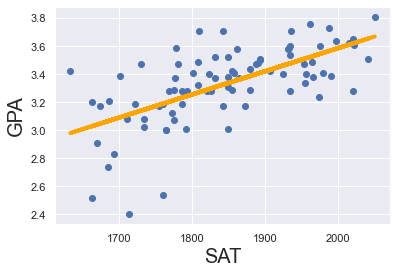

In [109]:
# Plot the data
plt.scatter(x,y)

# Using the parameters from the model to create the regression line (y = mx + b)
yhat = reg.coef_ * x_matrix + reg.intercept_

# Plotting the regression line
fig = plt.plot(x,yhat, lw=4, c='orange', label='regression line')

# Labelling our axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

Looking at the scatter plot above, we can see that our predicted linear equation (orange line) fits the data (blue dots) pretty well! **Fun insight to scikit-learn's magic: This line was created by trying a bunch of different lines and minimizing the distance from the line to all the points.**

# 3. Multiple Linear Regression

## Load the data

In [110]:
# We start by loading the data
data = pd.read_csv('multiple_linear_regression.csv')

# Let's explore the top 5 rows of the df
data.head()

,SAT,ACT,GPA
0,1714,31,2.40
1,1664,35,2.52
2,1760,32,2.54
3,1685,32,2.74
4,1693,34,2.83


In [111]:
data.describe()

,SAT,ACT,GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,28.559524,3.330238
std,104.530661,4.917025,0.271617
min,1634.000000,20.000000,2.400000
25%,1772.000000,24.750000,3.190000
50%,1846.000000,29.500000,3.380000
75%,1934.000000,32.250000,3.502500
max,2050.000000,36.000000,3.810000


## Create the multiple linear regression

In [112]:
# There are now 2 independent variables: 'SAT' and 'ACT'
x = data[['SAT', 'ACT']]

# and a single depended variable: 'GPA'
y = data['GPA']

In [113]:
# We start the same by creating a linear regression object
reg = LinearRegression()

# Fit the regression
reg.fit(x,y)

LinearRegression()

In [114]:
# Getting the coefficients of the regression
reg.coef_
# Note that the output is an array because we have multiple features ('SAT' and 'ACT')

array([0.00166351, 0.00088366])

In [115]:
# Getting the intercept of the regression
reg.intercept_

0.23536939985790672

### Making predictions

In [116]:
# There is a dedicated method should we want to predict values
# Note that the result is an array, as we can predict more than one value at a time
reg.predict(np.array([1740, 32]).reshape(1, -1))

array([3.15815427])

In [117]:
# To be in line with our knowledge so far, we can create a pandas data frame with several different values of SAT
new_data = pd.DataFrame(data=[[1740, 32],[1760, 35]],columns=['SAT', 'ACT'])
new_data

,SAT,ACT
0,1740,32
1,1760,35


In [118]:
# We can predict the whole data frame in bulk
# Note that the result is an array, this time with 2 elements
reg.predict(new_data)

array([3.15815427, 3.19407547])

In [119]:
# Finally, we can directly store the predictions in a new series of the same dataframe
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,ACT,Predicted_GPA
0,1740,32,3.158154
1,1760,35,3.194075
